In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

#--------------------Setup the main directories------------------#
#Define the various directories
script_dir = os.getcwd()                         #define current dir
main_dir = os.path.dirname(script_dir)           #go up of one directory
results_dir = os.path.join(main_dir, "figure")   #define results dir

if not os.path.exists(results_dir):              #if the directory does not exist create it
    os.mkdir(results_dir)


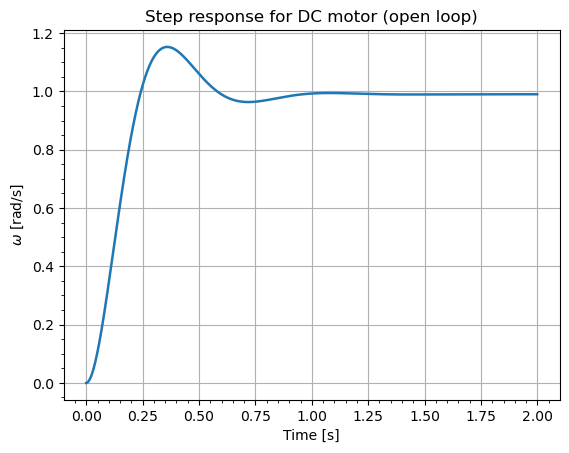

In [2]:
#NUMERICAL SIMULATION (OLD)

#-----------------Integrator: Euler method------------------------#
def euler_step(u, F, dt, *params):
    return u + dt * F(u, *params)  #nd array of u at instant n+1

#--------------------------Right Hand Side------------------------#
def F(u, J, b, Kt, Ke, R, L, V):
    #define A and B
    A = np.array([[-b/J, Kt/J, 0], [-Ke/L, -R/L, 0], [1, 0, 0]])     #matrix A of the system
    B = np.array((0, V/L, 0))
    return A @ u + B

#----------------------------Step function------------------------#
def step_function(t, t0=0):
    return np.heaviside(t-t0, 1)    # 0 if t < t0
                                    # 1 if t >= t0

#--------------------------Temporal evolution----------------------#
def evolution(int_method, Nt_step, dt, physics_params, V, t0):
    #-----------------Initialize the problem-------------------#
    tmax = dt * Nt_step             #total time of simulation
    tt = np.arange(0, tmax, dt)     #temporal grid
    u0 = np.array((0, 0, 0))           #initial condition
    u_t = np.copy(u0)               #create a copy to evolve it in time
    V_signal = V(tt, t0)            #signal applied to the system in time
    #----------------------------------------------------------#

    #----------------------Time evolution----------------------#
    w = []      #initialize list of w value
    i = []      #initialize list of i value
    theta = []  #initialize list of theta value
    for Vi in V_signal:
        u_t = int_method(u_t, F, dt, *physics_params, Vi) #step n+1
        w.append(u_t[0])
        i.append(u_t[1])
        theta.append(u_t[2])
    return tt, np.array(w), np.array(i), np.array(theta)


if __name__ == '__main__':
    #Parameters of the simulation
    Nt_step = 2e3     #temporal steps
    dt = 1e-3         #temporal step size
    #Parameters of the system
    J = 0.01    #rotor's inertia [kg m^2]
    b = 0.001   #viscous friction coefficient [N m s]
    Kt = 1      #torque constant
    Ke = 1      #electric constant
    R = 10      #resistance [Ohm]
    L = 1       #inductance [H]
    t0 = 0      #parameter of the step function [s]

    #Signal applied to the system
    V = step_function

    #Simulation
    physical_params = [J, b, Kt, Ke, R, L]
    simulation_params = [euler_step, Nt_step, dt]
    tt, w, i, theta = evolution(*simulation_params, physical_params, V, t0)

    #--------------------------Plot results----------------------#
    plt.title('Step response for DC motor (open loop)')
    plt.xlabel('Time [s]')
    plt.ylabel('$\omega$ [rad/s]')
    plt.grid(True)
    plt.minorticks_on()
    plt.plot(tt, w, linestyle='-', linewidth=1.8, marker='')

    # save the plot in the results dir
    #out_name = os.path.join(results_dir, "StepResp_theta_numSim1.png")
    #plt.savefig(out_name)
    plt.show()

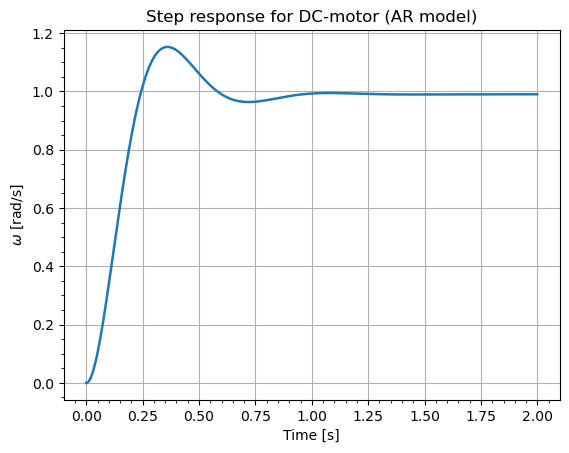

In [7]:
J = 0.01    #rotor's inertia [kg m^2]
b = 0.001   #viscous friction coefficient [N m s]
Kt = 1      #torque constant
Ke = 1      #electric constant
R = 10      #resistance [Ohm]
L = 1       #inductance [H]

#define time parameters
Nt_step = 2e3
dt = 1e-3
tmax = dt * Nt_step
tt = np.arange(0, tmax, dt)


#AR parameter
alpha12 = Kt * dt /J
alpha11 = 1 - b * dt /J
alpha22 = 1 - R * dt /L
alpha21 = - Ke * dt /L
beta = 1 * dt /L

A = np.array([[alpha11, alpha12], [alpha21, alpha22]])     #matrix A of the system
B = np.array((0, 1/L))

#define initial array
u = np.ones(time)      #step function

#define initial array of y = [w, i]
y = np.zeros((time,2))     #initial condition are setted to zero

for k in range(0, time-1):
    y[k+1] = A@y[k] + B*u[k]
    
#--------------------------Plot results----------------------#
plt.title('Step response for DC-motor (AR model)')
plt.xlabel('Time [s]')
plt.ylabel('$\omega$ [rad/s]')
plt.grid(True)
plt.minorticks_on()
plt.plot(tt,y[:,0]/1000, linestyle='-', linewidth=1.8, marker='')

# save the plot in the results dir
out_name = os.path.join(results_dir, "StepRespAR_DCmotor.png")
plt.savefig(out_name)
plt.show()